In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualization Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
print()

Используя пакет **graphviz** получим изображение графа дерева решений

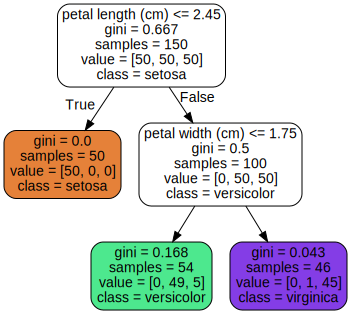

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

dot_path = os.path.join(IMAGES_PATH, "iris_tree.dot")
Source.from_file(dot_path)

Получим основные метрики (для фана) для класса 1 против классов 0 и 2. 
Слеудет отметить. Что увеличив значения параметра глубины дерева, мы конечно увеличим его продуктивность.

In [4]:
from sklearn.metrics import confusion_matrix

y_pred = tree_clf.predict(X)
y_ = (y == 1)
y_pred_ = (y_pred == 1)
mtx = confusion_matrix(y_, y_pred_)

tp = mtx[1][1]
tn = mtx[1][0]
fp = mtx[0][1]
print("true positive:", tp)
print("true negative:", tn)
print("false positive:", fp)
print("class 1 accuracity: {:.4}%".format(100*tp/(tp + fp)))
print("class 1 recall: {:.4}%".format(100*tp/(tp + tn)))

true positive: 49
true negative: 1
false positive: 5
class 1 accuracity: 90.74%
class 1 recall: 98.0%


In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

In [6]:
check_instance = [5, 1.5]
check_class = tree_clf.predict([check_instance])[0]
check_probabilities = tree_clf.predict_proba([check_instance])[0][check_class] *100
print("predictrion result: {0}".format(check_class))
print("prediction probabilities: {0:.4}%".format(check_probabilities))

predictrion result: 1
prediction probabilities: 90.74%


# Regression

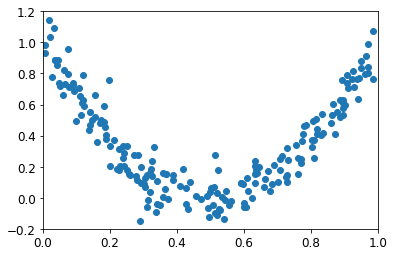

In [7]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10 # +шум

plt.axis([0, 1., -0.2, 1.2])
plt.scatter(X, y)

In [8]:
from sklearn.tree import DecisionTreeRegressor

dec_reg = DecisionTreeRegressor(random_state=42, 
                                max_depth=3) 
dec_reg.fit(X, y)

x_plt = np.linspace(0, 1., 1000).reshape(-1,1)
y_pred = dec_reg.predict(x_plt)

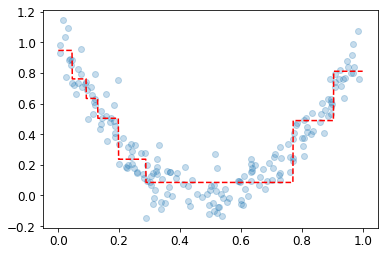

In [9]:
#plt.scatter(x_plt, y_pred, c='r', marker='*')
plt.scatter(X, y, alpha=0.25)
plt.plot(x_plt, y_pred, "r--")

# Построение графиков

In [10]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

def get_confusion_mtx(model, x_train, y_train):
    predict = model.predict(x_train)
    mtx = confusion_matrix(y_train, predict)
    print("accuracy:", accuracy_score(y_train, predict))
    print("confusion matrix:\n", mtx)
    return mtx

def print_classification_mesh(mtx, true_class_index):
    tp = mtx[true_class_index][true_class_index]
    
    tn = -tp;
    for i in range(mtx.shape[0]):
        tn += mtx[true_class_index][i]
    
    fp = -tp;
    for i in range(mtx.shape[1]):
        fp += mtx[i][true_class_index]
    
    #print("true positive:", tp)
    #print("true negative:", tn)
    #print("false positive:", fp)
    print("class {} accuracity: {:.4}%".format(true_class_index, 100*tp/(tp + fp)))
    print("class {} recall: {:.4}%".format(true_class_index, 100*tp/(tp + tn)))

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
x1 = X[:, 0]
x2 = X[:, 1]
X = np.c_[x1, x2*100]

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

mtx = get_confusion_mtx(tree_clf, X, y)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)
print_classification_mesh(mtx, 2)

accuracy: 0.96
confusion matrix:
 [[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
class 0 accuracity: 100.0%
class 0 recall: 100.0%
class 1 accuracity: 90.74%
class 1 recall: 98.0%
class 2 accuracity: 97.83%
class 2 recall: 90.0%


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scalled = scaler.fit_transform(X)

tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf2.fit(x_scalled, y)

mtx = get_confusion_mtx(tree_clf2, x_scalled, y)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)
print_classification_mesh(mtx, 2)

accuracy: 0.96
confusion matrix:
 [[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
class 0 accuracity: 100.0%
class 0 recall: 100.0%
class 1 accuracity: 90.74%
class 1 recall: 98.0%
class 2 accuracity: 97.83%
class 2 recall: 90.0%


# Задания

## Задание 1

What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with 1 million instances?

Если ввести несколько допущений: абсолютно чистые зоны с большим кол-во экземпляров отсутствуют; дерево, генерируемое алгоритмом идеально сбалансировано, то все экземпляры набора данных являются его листьями, т.о. высота дерева - log(листьев) ~ 20. 

## Задание 2

Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?

Функция стоимости способствует разделению узла таким образом, чтобы уменьшить gini данной области. Однако, разделение может быть таким, что одни новых дочерний узел будет охватывать большую область с низким gini, а второй узел покажет gini больше чем родительский (из-за малого кол-ва данных и большого загрязнения). 

Пример из ответов:
Если линейный данные - массив [A,B,A,A,A]. gini этой области равно gini = 1 - (1/5)^2 + (4/5)^2 = 0.32. Если разделить этот узел на два так [A,B] и [A,A,A], то gini 1го узла будет 0.5, а второго 0. Т.о. при разделении gini первого узла стал выше родительского. Однако общая gini зоны сократилась: 2/5*0,5 + 3/5 * 0 = 0,2.

## Задание 3

If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

При переобученной модели параметр глубины дерева следует уменьшить.

## Задание 4

If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

Дереву решений насрать на масштабирование данных и их центрированность.

## Задание 5

If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

Рассмотрим для дерева с отсутсвием ограничений на глубину и, что деревья абсолютно сбалансированные.  Время работы на каждом уровне 2го дерева будет в 10 раз больше, кроме того, высота второго дерева на 4 больше (24, против 20 в 1-м дереве). Т.о. если 1е дерево выполняет работы 20А, то 2е выполняет 240А. Разделим и получим, что 2й алгоритм будет работать 12 часов.

**Решение из книги** аапелирует к формуле, но мое тоже считаю справедливым:
Сложность алгоритма O(NxMxlog(N)). При 1млн данных получаем: 1mlog(1млн), при 10млн данных получаем: 10mlog(100млн). Разделим одно на другое и получим, что алгоритм с более массивным обучающем набором будет работать ~11.42 часа.

## Задание 6

If your training set contains 100,000 instances, will setting presort=True speed up training?

как я понимаю это работает только на малыых наборах данных. Т.к. на болььших наборах данных издержки на сортировку существенно сказываются на производительности.

## Задание 7

Train and fine-tune a Decision Tree for the moons dataset.


- Generate a moons dataset using make_moons(n_samples=10000, noise=0.4)
- Split it into a training set and a test set using train_test_split().
- Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.
- Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

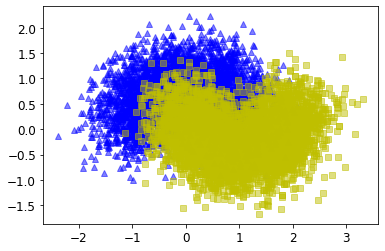

In [13]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

plt.plot(x_train[:, 0][y_train==0], x_train[:, 1][y_train==0], "b^", alpha=0.5)
plt.plot(x_train[:, 0][y_train==1], x_train[:, 1][y_train==1], "ys", alpha=0.5)

In [14]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [15]:
mtx = get_confusion_mtx(tree1, x_train, y_train)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)

mtx = get_confusion_mtx(tree1, x_test, y_test)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)

accuracy: 0.8555
confusion matrix:
 [[3329  658]
 [ 498 3515]]
class 0 accuracity: 86.99%
class 0 recall: 83.5%
class 1 accuracity: 84.23%
class 1 recall: 87.59%
accuracy: 0.863
confusion matrix:
 [[851 162]
 [112 875]]
class 0 accuracity: 88.37%
class 0 recall: 84.01%
class 1 accuracity: 84.38%
class 1 recall: 88.65%


In [16]:
from scipy.stats import uniform, randint,reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distr = {"max_depth": randint(1, 15), "criterion": ['gini', 'entropy'], 
              "splitter": ['best', 'random'], "min_samples_split": randint(2, 100),
              'max_leaf_nodes': randint(2, 200)}
search_cv = RandomizedSearchCV(tree1, param_distr, n_iter=5000, cv=3, 
                               n_jobs=-1, verbose=2,random_state=42)
search_cv.fit(x_train, y_train)
print("best esimator:", search_cv.best_estimator_)

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1772 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 5020 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 9548 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:  1.7min finished


best esimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=183,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=75,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')


In [17]:
search_cv.best_estimator_.fit(x_train, y_train)

mtx = get_confusion_mtx(search_cv.best_estimator_, x_train, y_train)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)

print()

mtx = get_confusion_mtx(search_cv.best_estimator_, x_test, y_test)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)

accuracy: 0.861875
confusion matrix:
 [[3453  534]
 [ 571 3442]]
class 0 accuracity: 85.81%
class 0 recall: 86.61%
class 1 accuracity: 86.57%
class 1 recall: 85.77%

accuracy: 0.866
confusion matrix:
 [[882 131]
 [137 850]]
class 0 accuracity: 86.56%
class 0 recall: 87.07%
class 1 accuracity: 86.65%
class 1 recall: 86.12%


Попробуем улучшить результаты с помощью GridSearch

In [18]:
from sklearn.model_selection import GridSearchCV

param_distr = {"min_samples_split": list(range(70, 80)),
               'max_leaf_nodes': list(range(175, 195)), "max_depth":[7,8,9,10]}
gridsearch_cv = GridSearchCV(search_cv.best_estimator_, param_distr, 
                             cv=3, n_jobs=-1, verbose=2)
gridsearch_cv.fit(x_train, y_train)
print("best esimator:", gridsearch_cv.best_estimator_)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:    9.1s


best esimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=175,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=76,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   10.3s finished


In [19]:
gridsearch_cv.best_estimator_.fit(x_train, y_train)

mtx = get_confusion_mtx(gridsearch_cv.best_estimator_, x_train, y_train)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)

print()

mtx = get_confusion_mtx(gridsearch_cv.best_estimator_, x_test, y_test)
print_classification_mesh(mtx, 0)
print_classification_mesh(mtx, 1)

accuracy: 0.861875
confusion matrix:
 [[3453  534]
 [ 571 3442]]
class 0 accuracity: 85.81%
class 0 recall: 86.61%
class 1 accuracity: 86.57%
class 1 recall: 85.77%

accuracy: 0.866
confusion matrix:
 [[882 131]
 [137 850]]
class 0 accuracity: 86.56%
class 0 recall: 87.07%
class 1 accuracity: 86.65%
class 1 recall: 86.12%


Никакой разницы

## Задание 8

Grow a forest.

- Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

- Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

- Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This gives you majority-vote predictions over the test set.

- Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest 

In [20]:
from random import shuffle

n_trees = 1000
n_instances = 100

x_train_splitted = list()
y_train_splitted = list()
distr = randint(0, x_train.shape[0])

for i in range(n_trees):
    idxs = distr.rvs(n_instances)
    x_train_splitted.append(x_train[idxs])
    y_train_splitted.append(y_train[idxs])

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.base import clone

forest = list()
accuracities = list()

for i in range(n_trees):
    model = clone(gridsearch_cv.best_estimator_)
    forest.append(model)
    forest[i].fit(x_train_splitted[i], y_train_splitted[i])
    predict =forest[i].predict(x_test)
    accuracities.append(accuracy_score(y_test, predict))


print("median accuracity:",  np.median(accuracities))
print("average accuracity:", np.average(accuracities))

median accuracity: 0.6905
average accuracity: 0.6953395


**Поскольку я перестарался в поиске параметров это мне помешало в выполнении этой задачи: выполнение последующих заданий приводит к плохим результатам по "точности" (порядка 72.3%). Очевидно это из-за значений моих гиперпараметров: min_samples_split и max_leaf_nodes значения которых я возьму из решения книги***

In [22]:
gridsearch_cv.best_estimator_.min_samples_split = 2
gridsearch_cv.best_estimator_.max_leaf_nodes = 17

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.base import clone

forest = list()
accuracities = list()

for i in range(n_trees):
    model = clone(gridsearch_cv.best_estimator_)
    forest.append(model)
    forest[i].fit(x_train_splitted[i], y_train_splitted[i])
    predict =forest[i].predict(x_test)
    accuracities.append(accuracy_score(y_test, predict))


print("median accuracity: {:.4}%".format(np.median(accuracities)*100))
print("average accuracity: {:.4}%".format(np.average(accuracities)*100))

median accuracity: 82.45%
average accuracity: 82.1%


**ч.т.д.**

Приступим к реализации предсказания для тестового набора данных

In [56]:
from scipy.stats import mode

def forest_score(forest, x_set, y_set, set_name):
    y_pred = []

    for tree in forest:
        predict = tree.predict(x_set)
        y_pred.append(predict)
    
    y_pred = np.asarray(y_pred)
    y_pred = mode(y_pred, axis=0).mode.reshape(-1,1)
    acc = accuracy_score(y_set, y_pred)
    print("{} accuracity: {:.4}%".format(set_name, acc*100))

In [57]:
forest_score(forest, x_train, y_train, 'training set')
forest_score(forest, x_test , y_test , 'test set')

training set accuracity: 86.33%
test set accuracity: 87.6%
